In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline

import statsmodels.api as sm

/Users/brandyn/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
fire_2012 = pd.read_csv('AFD_CY12 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2012.dropna(inplace=True)
fire_2012.index = pd.to_datetime(fire_2012.index)



In [4]:
fire_2012.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52113 entries, 2012-01-01 00:01:22 to 2012-12-31 23:42:33
Data columns (total 19 columns):
Master Incident Number           52113 non-null int64
CalendarYear                     52113 non-null int64
Cancellation Status              52113 non-null object
General Dispatched Problem       52113 non-null object
Calltaker Agency (AFD or EMS)    52113 non-null object
Order of AFD Arrival             52113 non-null object
Response Area (COA Only)         52113 non-null object
First Arriving Unit Name         52113 non-null object
Response Status                  52113 non-null object
PriorityDescription              52113 non-null object
EMS Time Phone Pickup            52113 non-null object
Earliest Time Phone Pickup       52113 non-null object
First Unit Assigned              52113 non-null object
Did not Reduce to Code 1         52113 non-null object
Onscene Time Was Correct         52113 non-null object
Latitude                         

In [11]:
#Convert Columns to datetime
fire_2012['First Unit Arrived'] = pd.to_datetime(fire_2012['First Unit Arrived'])
fire_2012['Earliest Time Phone Pickup'] = pd.to_datetime(fire_2012['Earliest Time Phone Pickup'])

In [6]:
fire_2012.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52113 entries, 2012-01-01 00:01:22 to 2012-12-31 23:42:33
Data columns (total 19 columns):
Master Incident Number           52113 non-null int64
CalendarYear                     52113 non-null int64
Cancellation Status              52113 non-null object
General Dispatched Problem       52113 non-null object
Calltaker Agency (AFD or EMS)    52113 non-null object
Order of AFD Arrival             52113 non-null object
Response Area (COA Only)         52113 non-null object
First Arriving Unit Name         52113 non-null object
Response Status                  52113 non-null object
PriorityDescription              52113 non-null object
EMS Time Phone Pickup            52113 non-null object
Earliest Time Phone Pickup       52113 non-null object
First Unit Assigned              52113 non-null object
Did not Reduce to Code 1         52113 non-null object
Onscene Time Was Correct         52113 non-null object
Latitude                         

In [32]:
fire_2012['Response Time (s)'] = (fire_2012['First Unit Arrived'] - fire_2012.index).astype('timedelta64[s]')
fire_2012['Response Time (m)'] = ((fire_2012['First Unit Arrived'] - fire_2012.index).astype('timedelta64[s]'))/60

In [33]:
fire_2012.head()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,...,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived,Response Time,Response Time (s),Response Time (m)
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:01:22,12000002,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-2204,ENG66,Code 3,4F,...,01/01/2012 00:01:58,No,Yes/Left Blank,30228693,97702907,01/01/2012 00:03:29,2012-01-01 00:05:11,229.0,229.0,3.816667
2012-01-01 00:11:47,12000008,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2206,ENG22,Code 3,1M,...,01/01/2012 00:12:36,No,Yes/Left Blank,30222216,97705176,01/01/2012 00:13:07,2012-01-01 00:15:13,206.0,206.0,3.433333
2012-01-01 00:16:14,12000012,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2403,ENG24,Code 3,2M,...,01/01/2012 00:16:40,No,Yes/Left Blank,30172163,97743423,01/01/2012 00:16:51,2012-01-01 00:19:44,210.0,210.0,3.500000
2012-01-01 00:21:26,12000015,2012,Not Cancelled,Other,AFD,1st or Only AFD,00-3001,ENG30,Code 3,3F,...,01/01/2012 00:22:13,No,Yes/Left Blank,30372899,97696675,01/01/2012 00:22:52,2012-01-01 00:26:35,309.0,309.0,5.150000
2012-01-01 00:26:09,12000019,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-1902,QNT19,Code 3,4F,...,01/01/2012 00:26:41,No,Yes/Left Blank,30352693,97776605,01/01/2012 00:27:43,2012-01-01 00:35:34,565.0,565.0,9.416667


In [34]:
fire_2012_month_df = fire_2012.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

In [35]:
#Rename the column
fire_2012_month_df.columns = ['Avg Response Time (s)']
fire_2012_month_df.head()

,Avg Response Time (s)
AFD Time Phone Pickup,
2012-01-31,368.935775
2012-02-29,374.062564
2012-03-31,373.176854
2012-04-30,375.892537
2012-05-31,388.000219


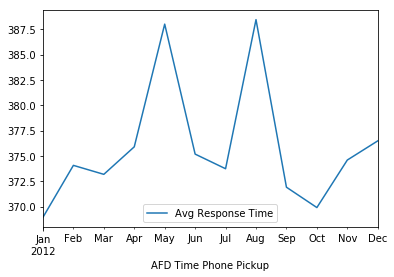

In [31]:
fire_2012_month_df.plot()

### 2012 Average Response Time

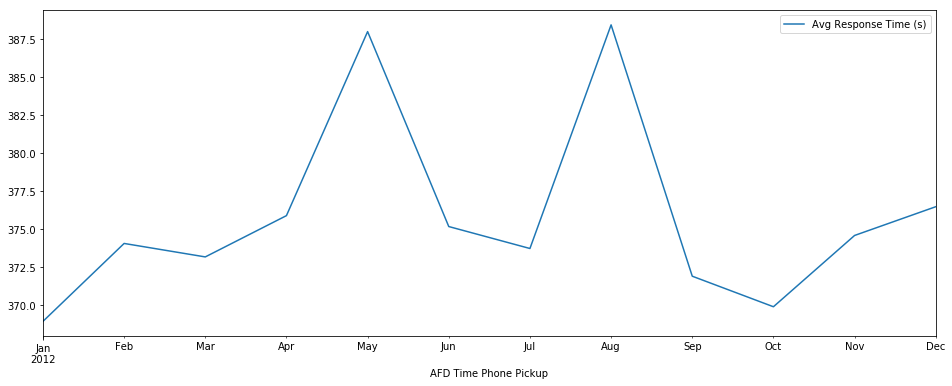

In [37]:
#Bring In data
fire_2012 = pd.read_csv('AFD_CY12 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2012.dropna(inplace=True)
fire_2012.index = pd.to_datetime(fire_2012.index)

#Convert Columns to datetime
fire_2012['First Unit Arrived'] = pd.to_datetime(fire_2012['First Unit Arrived'])
fire_2012['Earliest Time Phone Pickup'] = pd.to_datetime(fire_2012['Earliest Time Phone Pickup'])

fire_2012['Response Time (s)'] = (fire_2012['First Unit Arrived'] - fire_2012.index).astype('timedelta64[s]')
fire_2012['Response Time (m)'] = ((fire_2012['First Unit Arrived'] - fire_2012.index).astype('timedelta64[s]'))/60

fire_2012_month_df = fire_2012.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
fire_2012_month_df.columns = ['Avg Response Time (s)']
#Plot the data
fire_2012_month_df.plot(figsize=(16,6))


### 2013 Average Response Time

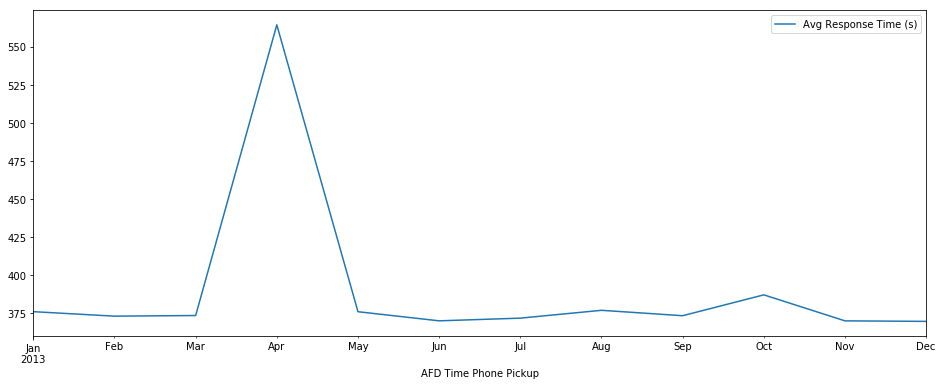

In [39]:
#Bring In data
fire_2013 = pd.read_csv('AFD_CY13 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2013.dropna(inplace=True)
fire_2013.index = pd.to_datetime(fire_2013.index)

#Convert Columns to datetime
fire_2013['First Unit Arrived'] = pd.to_datetime(fire_2013['First Unit Arrived'])
fire_2013['Earliest Time Phone Pickup'] = pd.to_datetime(fire_2013['Earliest Time Phone Pickup'])

fire_2013['Response Time (s)'] = (fire_2013['First Unit Arrived'] - fire_2013.index).astype('timedelta64[s]')
fire_2013['Response Time (m)'] = ((fire_2013['First Unit Arrived'] - fire_2013.index).astype('timedelta64[s]'))/60

fire_2013_month_df = fire_2013.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
fire_2013_month_df.columns = ['Avg Response Time (s)']
#Plot the data
fire_2013_month_df.plot(figsize=(16,6))



### 2014 Average Response Time

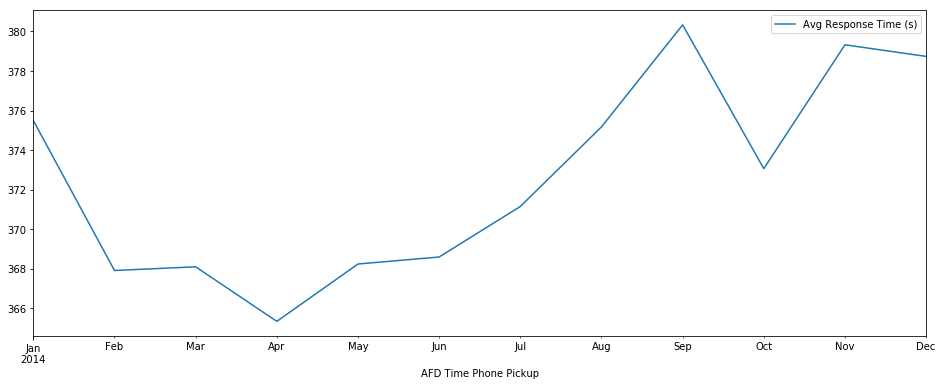

In [40]:
#Bring In data
fire_2014 = pd.read_csv('AFD_CY14 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2014.dropna(inplace=True)
fire_2014.index = pd.to_datetime(fire_2014.index)

#Convert Columns to datetime
fire_2014['First Unit Arrived'] = pd.to_datetime(fire_2014['First Unit Arrived'])

fire_2014['Response Time (s)'] = (fire_2014['First Unit Arrived'] - fire_2014.index).astype('timedelta64[s]')
fire_2014['Response Time (m)'] = ((fire_2014['First Unit Arrived'] - fire_2014.index).astype('timedelta64[s]'))/60

fire_2014_month_df = fire_2014.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
fire_2014_month_df.columns = ['Avg Response Time (s)']
#Plot the data
fire_2014_month_df.plot(figsize=(16,6))



### 2015 Average Response Time

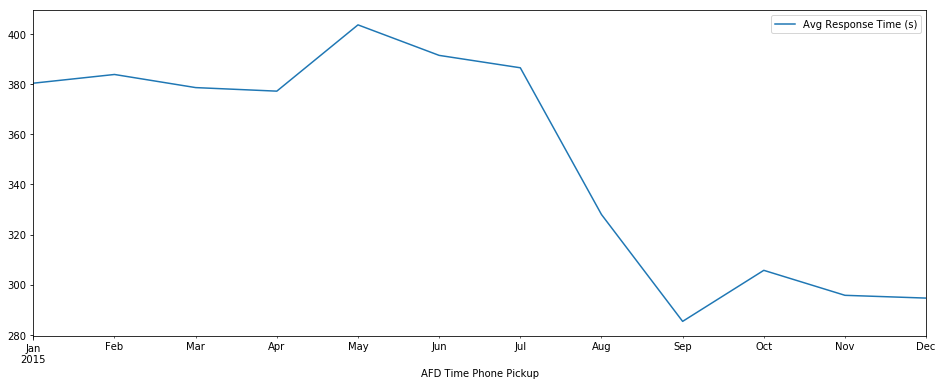

In [41]:
#Bring In data
fire_2015 = pd.read_csv('AFD_CY15 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2015.dropna(inplace=True)
fire_2015.index = pd.to_datetime(fire_2015.index)

#Convert Columns to datetime
fire_2015['First Unit Arrived'] = pd.to_datetime(fire_2015['First Unit Arrived'])

fire_2015['Response Time (s)'] = (fire_2015['First Unit Arrived'] - fire_2015.index).astype('timedelta64[s]')
fire_2015['Response Time (m)'] = ((fire_2015['First Unit Arrived'] - fire_2015.index).astype('timedelta64[s]'))/60

fire_2015_month_df = fire_2015.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
fire_2015_month_df.columns = ['Avg Response Time (s)']
#Plot the data
fire_2015_month_df.plot(figsize=(16,6))

### 2016 Average Response Time

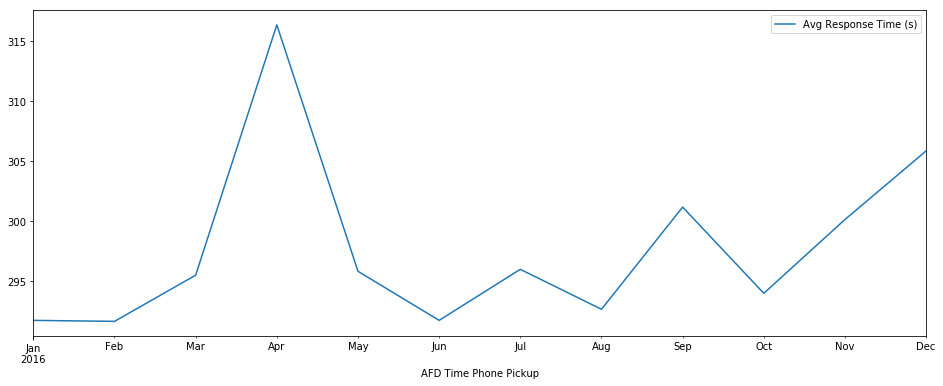

In [43]:
#Bring In data
fire_2016 = pd.read_csv('AFD_CY16 - SOC Fire Data Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2016.dropna(inplace=True)
fire_2016.index = pd.to_datetime(fire_2016.index)

#Convert Columns to datetime
fire_2016['First Unit Arrived'] = pd.to_datetime(fire_2016['First Unit Arrived'])

fire_2016['Response Time (s)'] = (fire_2016['First Unit Arrived'] - fire_2016.index).astype('timedelta64[s]')
fire_2016['Response Time (m)'] = ((fire_2016['First Unit Arrived'] - fire_2016.index).astype('timedelta64[s]'))/60

fire_2016_month_df = fire_2016.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
fire_2016_month_df.columns = ['Avg Response Time (s)']
#Plot the data
fire_2016_month_df.plot(figsize=(16,6))

### 2017 Average Response Time

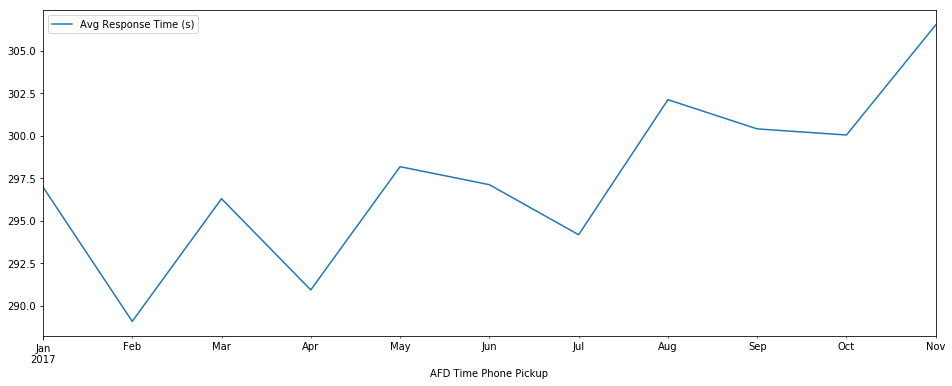

In [44]:
#Bring In data
fire_2017 = pd.read_csv('AFD_CY17 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2017.dropna(inplace=True)
fire_2017.index = pd.to_datetime(fire_2017.index)

#Convert Columns to datetime
fire_2017['First Unit Arrived'] = pd.to_datetime(fire_2017['First Unit Arrived'])

fire_2017['Response Time (s)'] = (fire_2017['First Unit Arrived'] - fire_2017.index).astype('timedelta64[s]')
fire_2017['Response Time (m)'] = ((fire_2017['First Unit Arrived'] - fire_2017.index).astype('timedelta64[s]'))/60

fire_2017_month_df = fire_2017.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
fire_2017_month_df.columns = ['Avg Response Time (s)']
#Plot the data
fire_2017_month_df.plot(figsize=(16,6))

In [45]:
#To Concat the final frames
final_df = pd.concat([fire_2012_month_df, fire_2013_month_df, fire_2014_month_df, fire_2015_month_df, fire_2016_month_df, fire_2017_month_df])

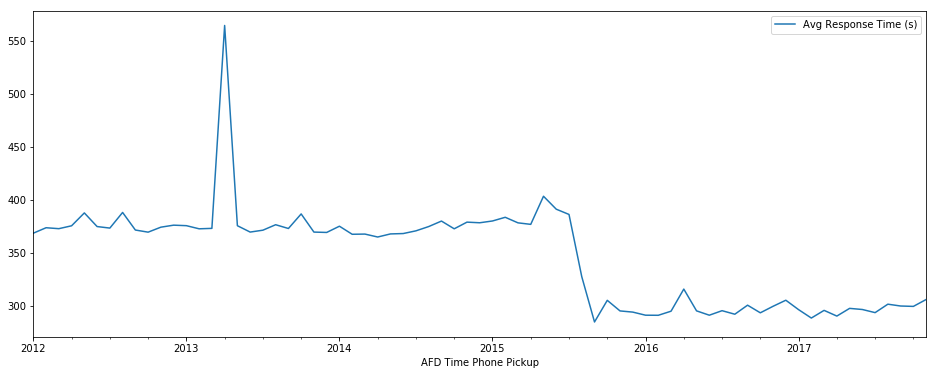

In [46]:
final_df.plot(figsize=(16,6))

In [52]:
#Moving Averages
final_df['EWMA12'] = final_df['Avg Response Time (s)'].ewm(span=12).mean()
final_df['EWMA6'] = final_df['Avg Response Time (s)'].ewm(span=6).mean()
#Variance
final_df['12 Month Variance'] = final_df['Avg Response Time (s)'].rolling(12).std()

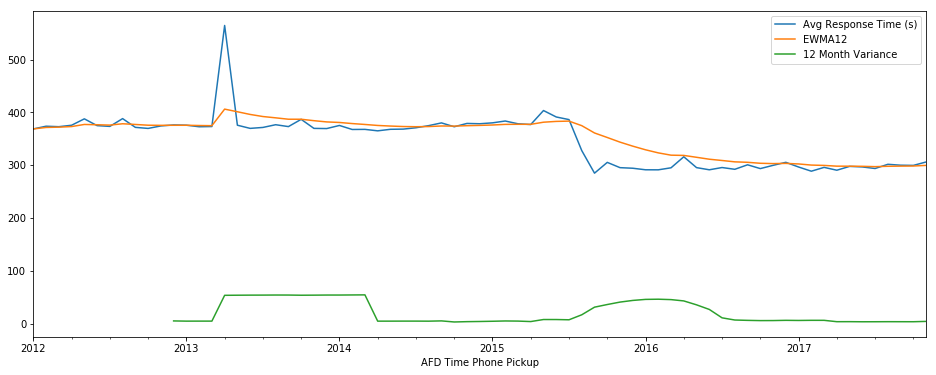

In [53]:
final_df[['Avg Response Time (s)', 'EWMA12', '12 Month Variance']].plot(figsize=(16,6))

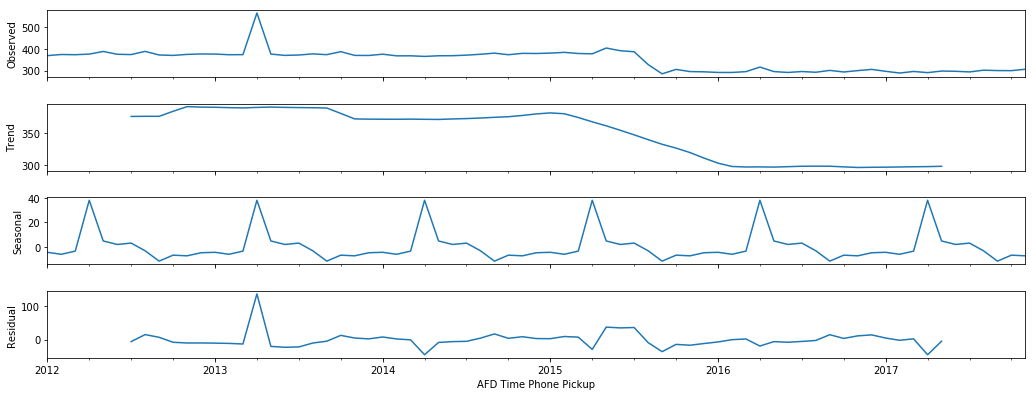

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(final_df['Avg Response Time (s)'])
fig = result.plot()
fig.set_size_inches(16,6)

In [48]:
from statsmodels.tsa.stattools import adfuller

#Function to test the dataset

def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Obversations used']
    for value,label in zip(result, labels):
        print(label + " : " + str(value))
        
    if result[1]< 0.05:
        print("Strong evidence to reject the null")
        print("Data is stationary")
    else:
        print("Cannot Reject the null")
        print("Data is not stationary")

In [49]:
adf_check(final_df['Avg Response Time (s)'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.51297364855
p-value : 0.527083977045
# of lags : 2
Num of Obversations used : 68
Cannot Reject the null
Data is not stationary


### ARIMA

In [57]:
model = sm.tsa.statespace.SARIMAX(final_df['Avg Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))

model_result = model.fit()

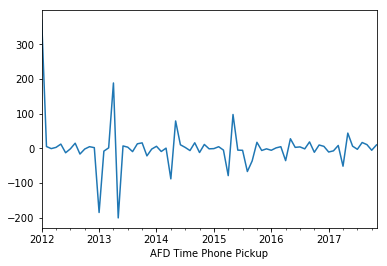

In [58]:
model_result.resid.plot()

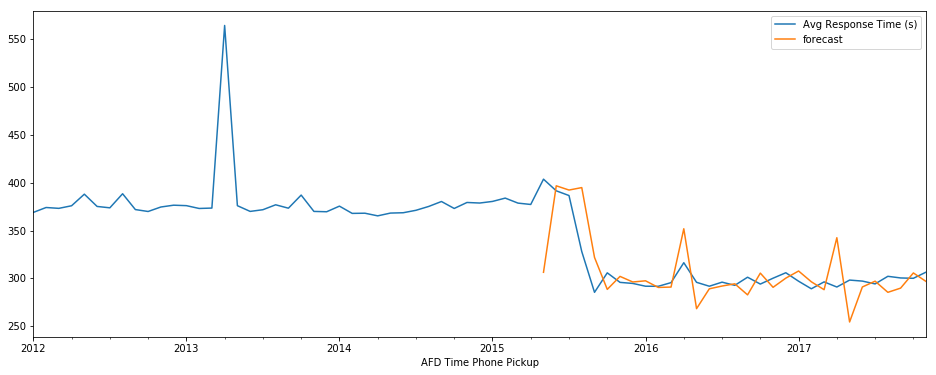

In [59]:
final_df['forecast'] = model_result.predict(start=40, end=70)
final_df[['Avg Response Time (s)', 'forecast']].plot(figsize=(16,6))